## We'll sove the precision and recall value for the iris dataset here. 

In [16]:
#importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")



In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Next, we'll load the Iris flower dataset, which is in the "iris.csv" directory

iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data 

iris.head()
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
# Seperating the data into dependent and independent variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Now , let us see the scores with **K-Nearest Neighbors** technique.

In [19]:
# K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


### Now, we have to build the ROC Curve and find the value of Area under the curve

In [20]:
#importing libraries
from sklearn import datasets
 
iris = datasets.load_iris()
 
# Get only the setosa and versicolor data
iris_data = iris.data[0:100,:]
iris_target = iris.target[0:100]

In [21]:
# splitting the data into train and test datasets
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split (iris_data[:,0], iris_target)
 
# Model the data using Logistic Regression
from sklearn import linear_model
 
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(iris_data[:,0].reshape(-1,1), iris_target)
LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# importing libraries to plot ROC Curve

from sklearn.metrics import roc_curve, auc
 
probabilities = model.predict_proba(X_test.reshape(-1,1))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

Text(0.3, 0.8, 'ROC Curve')

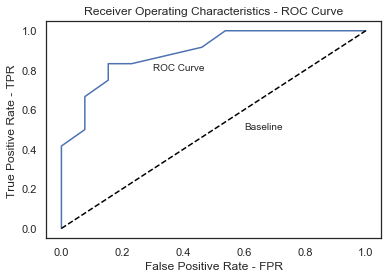

In [23]:
#importing matplotlib to visualize the diagram 
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color="black",linestyle="--")
 
plt.xlabel("False Positive Rate - FPR")
plt.ylabel("True Positive Rate - TPR ")
plt.title("Receiver Operating Characteristics - ROC Curve")
plt.text(0.6,0.5,"Baseline")
plt.text(0.3,0.8,"ROC Curve")

In [24]:
from sklearn.metrics import roc_auc_score
 
roc_auc_score(y_test, probabilities)


0.891025641025641